# Personnel Analysis 

## Using data from IMDB and Box Office Mojo

### Seeking top industry directors and studios by average gross box office revenue 

---
## Importing packages and loading files

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [150]:
!ls data

bom.movie_gross.csv       imdb.title.crew.csv       rt.reviews.tsv
imdb.name.basics.csv      imdb.title.principals.csv tmdb.movies.csv
imdb.title.akas.csv       imdb.title.ratings.csv    tn.movie_budgets.csv
imdb.title.basics.csv     rt.movie_info.tsv


In [151]:
title_basics_df = pd.read_csv('data/imdb.title.basics.csv')
name_basics_df = pd.read_csv('data/imdb.name.basics.csv')
crew_df = pd.read_csv('data/imdb.title.crew.csv')
principal_df = pd.read_csv('data/imdb.title.principals.csv')
ratings_df = pd.read_csv('data/imdb.title.ratings.csv')
Mojo_df = pd.read_csv('data/bom.movie_gross.csv')
tnum_df = pd.read_csv('data/tn.movie_budgets.csv')

## Inspecting IMDB DataFrames

In [152]:
title_basics_df.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [153]:
ratings_df.head(2)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


## Merging the Titles with the Ratings

In [154]:
imdb_df = title_basics_df.merge(ratings_df, on='tconst')
imdb_df.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43


## Merging crew information

In [155]:
imdb_df = imdb_df.merge(crew_df, on='tconst')
imdb_df.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,NaN


## Inspecting Box Office Mojo Data

In [158]:
Mojo_df.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


*## Merging crew information

## Merging Mojo and IMDB DataFrames
### Merging where titles to movies match

In [159]:
imdb_and_mojo_df = imdb_df.merge(Mojo_df, left_on='primary_title', right_on='title')
imdb_and_mojo_df.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,nm2349060,"nm7430071,nm1249226,nm0006765,nm0430785,nm2349...",Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,nm0758574,"nm0449616,nm1433580",On the Road,IFC,744000.0,8000000,2012


## Inspecting Final Merged DataFrame

In [160]:
imdb_and_mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   directors        3023 non-null   object 
 9   writers          2908 non-null   object 
 10  title            3027 non-null   object 
 11  studio           3024 non-null   object 
 12  domestic_gross   3005 non-null   float64
 13  foreign_gross    1832 non-null   object 
 14  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 378.4+ KB


In [161]:
imdb_and_mojo_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,nm2349060,"nm7430071,nm1249226,nm0006765,nm0430785,nm2349...",Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,nm0758574,"nm0449616,nm1433580",On the Road,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,nm7042169,NaN,On the Road,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,nm0935863,NaN,On the Road,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,nm0001774,"nm0175726,nm0862122",The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013


## Groupby Directors to find out average domestic gross of films released

In [162]:
director_df = imdb_and_mojo_df.groupby('directors').mean().reset_index()
director_df

,directors,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year
0,nm0000095,2013.142857,99.285714,6.714286,112297.285714,18000000.0,2013.142857
1,nm0000108,2014.000000,119.333333,6.666667,184237.333333,56085000.0,2014.333333
2,nm0000110,2012.500000,110.000000,6.600000,399088.500000,115800000.0,2012.500000
3,nm0000123,2014.000000,108.000000,6.266667,118783.000000,41600000.0,2014.000000
4,nm0000127,2010.500000,109.000000,5.500000,68580.000000,26450000.0,2010.500000
...,...,...,...,...,...,...,...
2259,nm9156702,2012.000000,65.000000,6.000000,6.000000,31400000.0,2018.000000
2260,nm9179246,2017.000000,119.000000,6.900000,6232.000000,690000.0,2017.000000
2261,nm9631956,2018.000000,120.000000,7.400000,54.000000,1300000.0,2013.000000
2262,nm9659009,2018.000000,108.000000,5.900000,384.000000,94500.0,2018.000000


## Creating a new DataFrame with the directors names and domestic gross average. 
### Merged using the nconst key

In [163]:
directors_box_df = director_df.merge(name_basics_df, left_on='directors', right_on='nconst')

## Filtering and plotting the top averafe grossing films by director name

In [164]:
top_dir = directors_box_df.loc[0:, ['domestic_gross', 'primary_name', 'primary_profession', 'nconst']]
top_dir = top_dir.sort_values(by=['domestic_gross'], ascending=False)
top_dir = top_dir[top_dir['domestic_gross'] > 300000000]
top_dir.head()

,domestic_gross,primary_name,primary_profession,nconst
1043,459000000.0,Joss Whedon,"writer,producer,director",nm0923736
1001,415000000.0,Lee Unkrich,"editorial_department,editor,miscellaneous",nm0881279
609,412600000.0,Patty Jenkins,"director,writer,producer",nm0420941
1423,400700000.0,Adam Green,"writer,producer,director",nm1697112
668,400700000.0,Chi-kin Kwok,"writer,director,actor",nm0477213


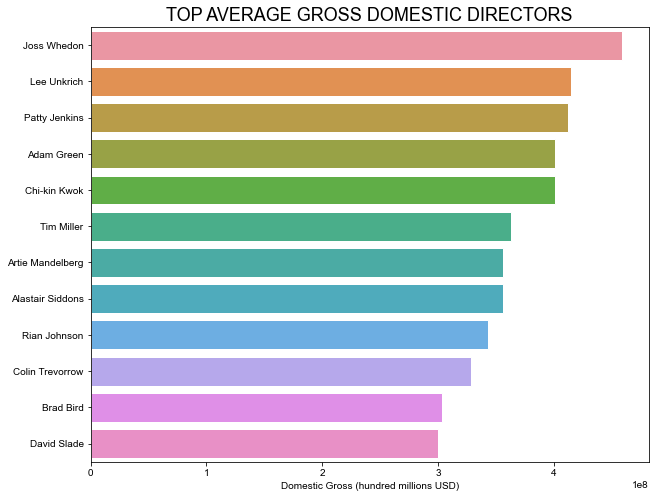

In [165]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.set_theme(style="darkgrid", palette='deep', font_scale=1.5)
# sns.color_palette("blue")
# sns.set(rc={'figure.figsize':(11,8)})

ax = sns.barplot(x="domestic_gross",y="primary_name", data=top_dir)
ax.set(xlabel="Domestic Gross (hundred millions USD)", ylabel = "", title="TOP AVERAGE GROSS DOMESTIC DIRECTORS");

## Simliar processing to the studios associate with top grossing films

In [ ]:
studio_df = imdb_and_mojo_df.groupby('studio').mean().reset_index()
studio_df

In [ ]:
top_stu = studio_df.loc[0:, ['studio', 'domestic_gross']]
top_stu = top_stu.sort_values(by=['domestic_gross'], ascending=False)
top_stu = top_stu.iloc[0:20]

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.set_theme(style="darkgrid", palette='deep', font_scale=1.5)
# sns.color_palette("blue")
# sns.set(rc={'figure.figsize':(11,8)})

ax = sns.barplot(x="domestic_gross",y="studio", data=top_stu)
ax.set(xlabel="Domestic Gross Average", ylabel = "", title="TOP AVERAGE GROSS DOMESTIC STUDIOS");

# Conclusion

These graphs could be helpful to show who the top studios and directors are and what sort of revenue they are making per film.

The directors list could show which directors might be worth hiring out for new film productions, since they average the highest gross on productions, hiring them should lower some risk to a new release tanking.

The studio risk helps to show what competitors are doing, who has the market share, and what excellence looks like. 

Recommendations we could make are to hire out directors from the top grossing list.


-----
## Additional Work in Process

I believe there should be some additional analysis to see the genres associated with the studios and directors, but the genres tab needs cleaning.

Additionally, the graphs need to have the x_ticks fixed 

I would also like to look at the profit margins if I have time.

In [ ]:
def studio_genres(studio):
    studio = str(studio)
    bv_genre = imdb_and_mojo_df[imdb_and_mojo_df['studio'] == studio]
    return bv_genre.groupby('genres').count().reset_index()
     

In [ ]:
# HOW MANY FILMS DID THEY HAVE IN THE DATA, AND WHAT GENRES ARE THEY MAKING?

## Industry profit margins. What happens with the more you put in?

In [4]:
# Make a year column
tnum_df['year'] = tnum_df['release_date'].str[-4:].astype('int64')

In [6]:
# Create a dataframe that only goes back to 2010
tnum_df = tnum_df[tnum_df['year'] > 2010]

In [7]:
#Clean up product budget 
tnum_df['production_budget_int'] = tnum_df['production_budget'].str.replace(',', '')
tnum_df['production_budget_int'] = tnum_df['production_budget_int'].str.strip('$')

In [9]:
#Clean up product budget into int64
tnum_df['production_budget_int'] = tnum_df['production_budget_int'].astype('int64')

In [10]:
# We only want to use relevant films, lets grab only production budgets over 10M
tnum_df = tnum_df[tnum_df['production_budget_int'] > 10000000]

In [11]:
# Clean up worldwide gross 
tnum_df['worldwide_gross_int'] = tnum_df['worldwide_gross'].str.replace(',', '')
tnum_df['worldwide_gross_int'] = tnum_df['worldwide_gross_int'].str.strip('$')

<ipython-input-11-f3e5db24e5d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tnum_df['worldwide_gross_int'] = tnum_df['worldwide_gross'].str.replace(',', '')
<ipython-input-11-f3e5db24e5d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tnum_df['worldwide_gross_int'] = tnum_df['worldwide_gross_int'].str.strip('$')


In [12]:
#Clean up worldwide gross into int64
tnum_df['worldwide_gross_int'] = tnum_df['worldwide_gross_int'].astype('int64')
tnum_df

<ipython-input-12-7ad48665d341>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tnum_df['worldwide_gross_int'] = tnum_df['worldwide_gross_int'].astype('int64')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,production_budget_int,worldwide_gross_int
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,410600000,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,350000000,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,330600000,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,317000000,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015,306000000,2053311220
...,...,...,...,...,...,...,...,...,...
3514,15,"Feb 5, 2016",Misconduct,"$11,000,000",$0,"$2,352,511",2016,11000000,2352511
3515,16,"Dec 31, 2019",Eli,"$11,000,000",$0,$0,2019,11000000,0
3517,18,"May 25, 2012",Les Intouchables,"$10,800,000","$13,182,281","$484,873,045",2012,10800000,484873045
3524,25,"Dec 6, 2013",The Last Days on Mars,"$10,600,000","$24,084","$261,364",2013,10600000,261364


In [33]:
# Only want relevant rows, take out worldwide_gross_int if > 100000
tnum_df_clean = tnum_df[tnum_df['worldwide_gross_int'] > 100000]
tnum_df_clean

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,production_budget_int,worldwide_gross_int
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,410600000,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,350000000,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,330600000,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,317000000,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015,306000000,2053311220
...,...,...,...,...,...,...,...,...,...
3513,14,"May 4, 2012",LOL,"$11,000,000",$0,"$10,431,506",2012,11000000,10431506
3514,15,"Feb 5, 2016",Misconduct,"$11,000,000",$0,"$2,352,511",2016,11000000,2352511
3517,18,"May 25, 2012",Les Intouchables,"$10,800,000","$13,182,281","$484,873,045",2012,10800000,484873045
3524,25,"Dec 6, 2013",The Last Days on Mars,"$10,600,000","$24,084","$261,364",2013,10600000,261364


In [34]:
tnum_df_clean['profit_amount'] = (tnum_df_clean['worldwide_gross_int'] - tnum_df_clean['production_budget_int'])
tnum_df_clean.sort_values(['profit_amount'])

<ipython-input-34-c4300e6a8c5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tnum_df_clean['profit_amount'] = (tnum_df_clean['worldwide_gross_int'] - tnum_df_clean['production_budget_int'])


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,production_budget_int,worldwide_gross_int,profit_amount
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,350000000,149762350,-200237650
193,94,"Mar 11, 2011",Mars Needs Moms,"$150,000,000","$21,392,758","$39,549,758",2011,150000000,39549758,-110450242
341,42,"Jun 14, 2019",Men in Black: International,"$110,000,000","$3,100,000","$3,100,000",2019,110000000,3100000,-106900000
477,78,"Apr 21, 2017",The Promise,"$90,000,000","$8,224,288","$10,551,417",2017,90000000,10551417,-79448583
619,20,"Jan 22, 2019",Renegades,"$77,500,000",$0,"$1,521,672",2019,77500000,1521672,-75978328
...,...,...,...,...,...,...,...,...,...,...
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",2012,225000000,1517935897,1292935897
66,67,"Apr 3, 2015",Furious 7,"$190,000,000","$353,007,020","$1,518,722,794",2015,190000000,1518722794,1328722794
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",2015,215000000,1648854864,1433854864
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015,306000000,2053311220,1747311220


In [35]:
tnum_df_clean['profit_margin'] = (tnum_df_clean['profit_amount']  / tnum_df_clean['worldwide_gross_int']) * 100
tnum_df_clean.sort_values('profit_margin')

<ipython-input-35-adab7540fab4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tnum_df_clean['profit_margin'] = (tnum_df_clean['profit_amount']  / tnum_df_clean['worldwide_gross_int']) * 100


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,production_budget_int,worldwide_gross_int,profit_amount,profit_margin
2319,20,"Apr 24, 2015",Yi ge ren de wu lin,"$25,000,000","$129,115","$129,115",2015,25000000,129115,-24870885,-19262.583743
2154,55,"Mar 17, 2015",Accidental Love,"$26,000,000",$0,"$135,436",2015,26000000,135436,-25864564,-19097.259222
2005,6,"Jun 5, 2015",United Passions,"$30,000,000",$918,"$168,832",2015,30000000,168832,-29831168,-17669.143290
820,21,"Oct 26, 2018",Air Strike,"$65,000,000",$0,"$516,279",2018,65000000,516279,-64483721,-12490.091791
2010,11,"Dec 31, 2013",Space Pirate Captain Harlock,"$30,000,000",$0,"$310,985",2013,30000000,310985,-29689015,-9546.767529
...,...,...,...,...,...,...,...,...,...,...,...
1623,24,"Sep 8, 2017",It,"$35,000,000","$327,481,748","$697,457,969",2017,35000000,697457969,662457969,94.981776
3001,2,"Aug 11, 2017",Annabelle: Creation,"$15,000,000","$102,092,201","$305,384,865",2017,15000000,305384865,290384865,95.088165
2491,92,"Dec 9, 2016",La La Land,"$20,000,000","$151,101,803","$426,351,163",2016,20000000,426351163,406351163,95.309031
3342,43,"Jun 6, 2014",The Fault in Our Stars,"$12,000,000","$124,872,350","$307,166,834",2014,12000000,307166834,295166834,96.093328


In [122]:
tnum_df_clean['is_profit'] = tnum_df_clean['profit_amount'] > 0
tnum_df_clean.sort_values('profit_amount', ascending=False)

<ipython-input-122-ea62f5e8f1bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tnum_df_clean['is_profit'] = tnum_df_clean['profit_amount'] > 0


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,production_budget_int,worldwide_gross_int,profit_amount,profit_margin,is_profit
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,300000000,2048134200,1748134200,85.352522,True
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015,306000000,2053311220,1747311220,85.097242,True
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",2015,215000000,1648854864,1433854864,86.960647,True
66,67,"Apr 3, 2015",Furious 7,"$190,000,000","$353,007,020","$1,518,722,794",2015,190000000,1518722794,1328722794,87.489488,True
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",2012,225000000,1517935897,1292935897,85.177240,True
...,...,...,...,...,...,...,...,...,...,...,...,...
619,20,"Jan 22, 2019",Renegades,"$77,500,000",$0,"$1,521,672",2019,77500000,1521672,-75978328,-4993.081821,False
477,78,"Apr 21, 2017",The Promise,"$90,000,000","$8,224,288","$10,551,417",2017,90000000,10551417,-79448583,-752.966004,False
341,42,"Jun 14, 2019",Men in Black: International,"$110,000,000","$3,100,000","$3,100,000",2019,110000000,3100000,-106900000,-3448.387097,False
193,94,"Mar 11, 2011",Mars Needs Moms,"$150,000,000","$21,392,758","$39,549,758",2011,150000000,39549758,-110450242,-279.269072,False


In [93]:
print('mean profit:', round(tnum_df_clean['profit_amount'].mean()))
print('median profit:', tnum_df_clean['profit_amount'].median())
print('mean expense:', round(tnum_df_clean['production_budget_int'].mean()))
print('median expense:', tnum_df_clean['production_budget_int'].median())

mean_pe = pd.DataFrame({'mean_profit': 133514655, 'mean_expense': 61478630}, index=[0])
median_pe = pd.DataFrame({'median_profit': 49894908, 'median_expense': 38000000}, index=[0])

mean profit: 133514655.0
median profit: 49894908.0
mean expense: 61478630.0
median expense: 38000000.0


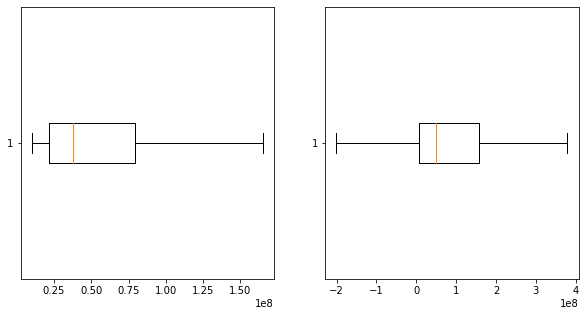

In [143]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), ncols=2)

ax1.boxplot(tnum_df_clean['production_budget_int'], vert=False, showfliers=False)
ax2.boxplot(tnum_df_clean['profit_amount'], vert=False, showfliers=False);

Text(0.5, 1.0, 'Scatter Plot of Profit Amount and Production Budget')

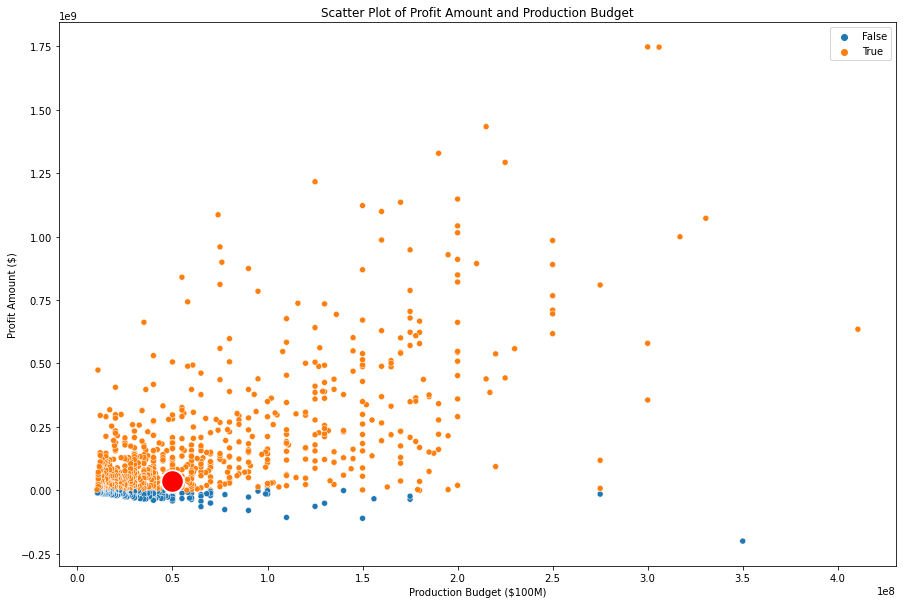

In [148]:
fig, ax = plt.subplots(figsize=(15, 10))

#Boxplot Production Budget

ax1.boxplot(tnum_df_clean['production_budget_int'], vert=False, showfliers=False)

sns.scatterplot(data=tnum_df_clean, x="production_budget_int", y="profit_amount", hue='is_profit')
# sns.scatterplot(data=mean_pe, x='mean_profit', y='mean_expense', s=500, color='red')
sns.scatterplot(data=median_pe, x='median_profit', y='median_expense', s=500, color='red')
ax.set_xlabel('Production Budget ($100M)')
ax.set_ylabel('Profit Amount ($)')
ax.set_title('Scatter Plot of Profit Amount and Production Budget')
# ax.set_xticklabels();

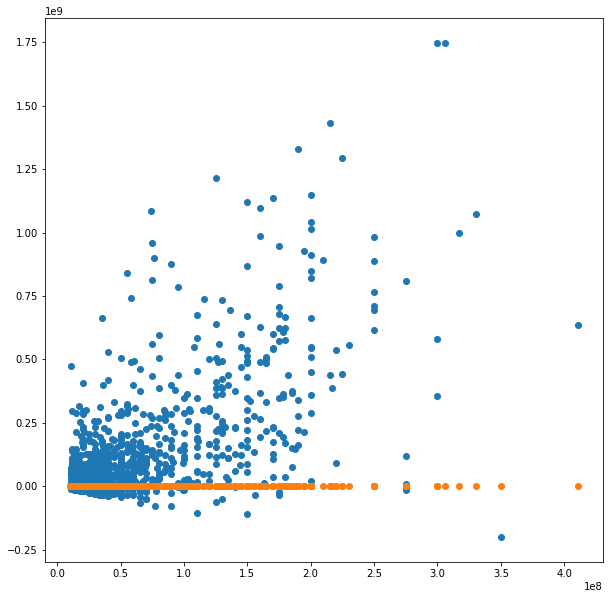

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(data=tnum_df_clean, x="production_budget_int", y="profit_amount")
ax.scatter(data=tnum_df_clean, x="production_budget_int", y="is_profit")

In [ ]:
# Where does the data come from? How can we assume those outliers. 

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(data=tnum_df, x="production_budget", y="profit_amount");

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.regplot(data=tnum_df, x="production_budget", y="profit_amount");

In [ ]:
np.corrcoef(tnum_df['production_budget'], tnum_df['profit_amount'])

In [ ]:
sns.boxplot(data=tnum_df, x="profit_margin", showfliers=False)

In [ ]:
# I am thinking to put production budgets into bins and see profit margins

In [ ]:
sns.histplot(data=tnum_df, x="profit_margin");